In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/Social_Network_Ads.csv"
data= pd.read_csv(file) #reading file


In [49]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [51]:
data.shape

(400, 5)

In [52]:
#target is purchased
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [53]:
#exploratory data analysis

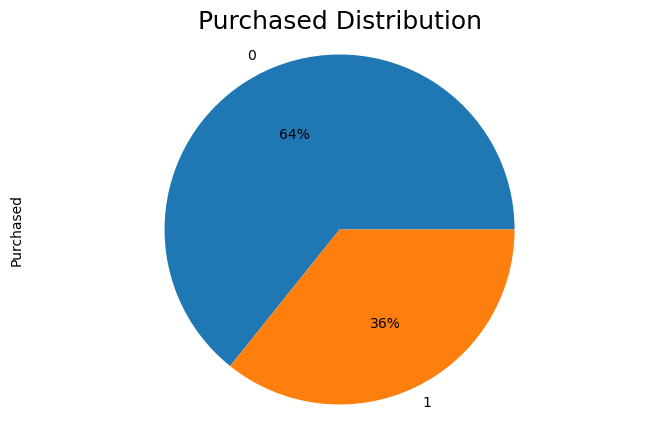

In [54]:
# Visualize the distribution of Purchased
plt.figure(figsize=(8,5))
data.Purchased.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title("Purchased Distribution", fontsize='18')
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

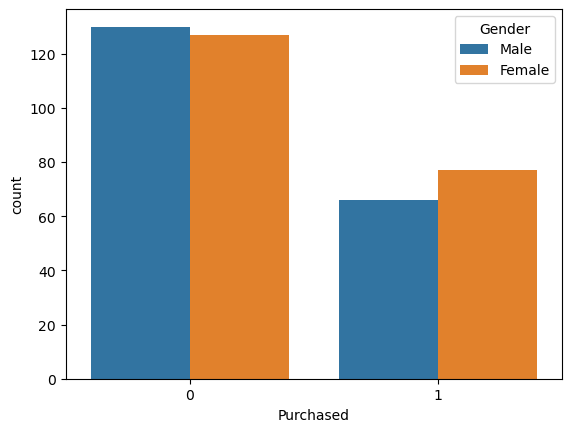

In [55]:
sns.countplot(data,x='Purchased',hue='Gender')

C:\Users\ppbin\AppData\Local\Temp\ipykernel_5412\4202982456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

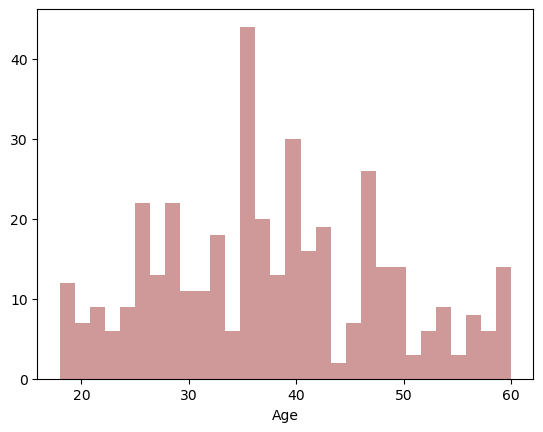

In [56]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=30)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_5412\865122259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='EstimatedSalary'>

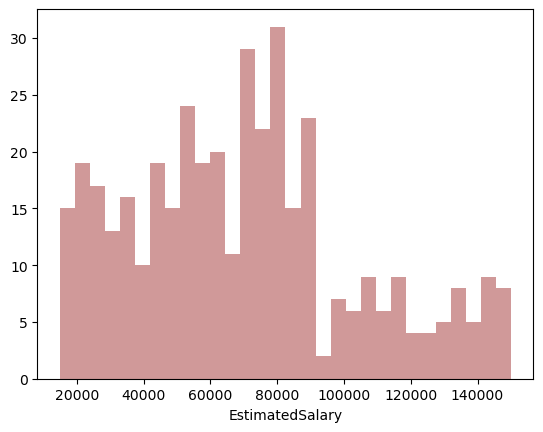

In [57]:
sns.distplot(data['EstimatedSalary'].dropna(),kde=False,color='darkred',bins=30)

In [58]:
#percentage
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [59]:
#one hot encoding on columns
data =pd.get_dummies(data)

In [60]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [61]:
#drop user id, as it doesn't help it
data1= data.drop('User ID', axis=1)

In [62]:
data1.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [63]:
data1.shape

(400, 5)

In [64]:
#it is pure data, therefore no normalisation/scaling
X= data1.drop('Purchased', axis=1)
y= data1['Purchased']

In [65]:
X.shape

(400, 4)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, 
                                                  random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr= LogisticRegression()

In [70]:
model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
#evaluation matrices which we use for classification problem
#confusion matrix
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred)

array([[63,  0],
       [37,  0]], dtype=int64)

In [73]:
#accuracy, precision score, recall score, f1score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.63
0.0
0.0
0.0


C:\Users\ppbin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#kNN model!
from sklearn.neighbors import KNeighborsClassifier

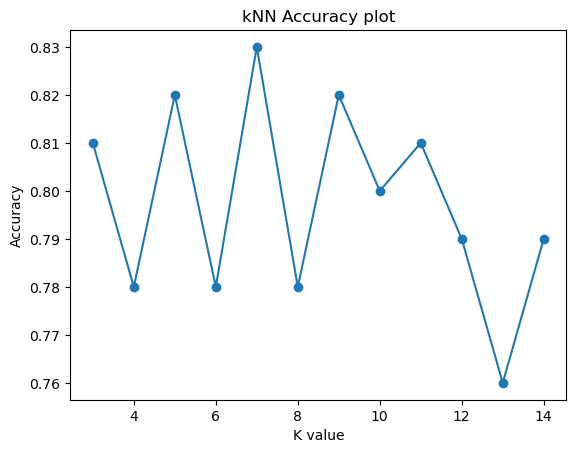

In [75]:
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()



In [76]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.83

In [78]:
confusion_matrix(y_test, y_pred)

array([[59,  4],
       [13, 24]], dtype=int64)

In [79]:
X.columns

Index(['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'], dtype='object')

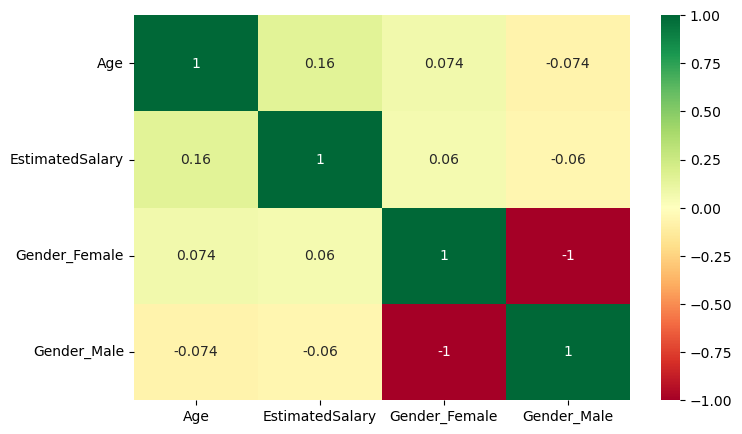

In [80]:
Selected_features = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data1[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()
